In [1]:
import numpy as np

list1 = ['a','b','c']
list2 = [10,20,30]

for i,j in zip(list1,list2):
    print(i,' ',j)

a   10
b   20
c   30


In [1]:
lines = {}
lines['Ha'] = [0,10,2]
lines['Hb'] = [0,11,3]

print(lines)

{'Ha': [0, 10, 2], 'Hb': [0, 11, 3]}


In [7]:
for l in lines:
    print (lines[l])

[0, 10, 2]
[0, 11, 3]


In [21]:
import numpy as np

m = np.array([1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1,1,0,0,0,0], dtype=bool)
m = m.astype(int)
dm = m[1:]-m[:-1]

if m[0] == 0:
    start = [0]
else:
    start = []
s, = np.where(dm==-1)
start.extend(list(s))
print(start)
end, = np.where(dm == 1)
end = list(end)
if m[-1] == 0:
    end.append(len(m)-1)
print(end)

[2, 8, 16]
[5, 11, 20]


In [17]:
masked = [(i,j) for (i,j) in zip(start,end)]

In [18]:
print(masked)

[(2, 5), (8, 11), (16, 20)]


## FITS table

In [27]:
from astropy.io import fits

path = '/Users/dfadda/Python/VIMOS/MOSA85V11/QUAD3/'
file = 'MOSA85V11_OBJECT_SCI_TABLE.fits'

hdul = fits.open(path+file)
header = hdul[0].header
data = hdul[1].data 
cols = hdul[1].columns
#hdul.info()
#cols.info()
hdul.close()

header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2015-02-06T13:18:15' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
ORIGIN  = 'ESO     '           / European Southern Observatory                  
MJD-OBS =       56545.24003975 / Obs start 2013-09-10T05:45:39.435              
DATE-OBS= '2013-09-10T05:45:39.434' / Date of observation                       
TELESCOP= 'ESO-VLT-U3'         / ESO <TEL>                                      
RA      =            10.401636 / 00:41:36.3 RA (J2000) pointing                 
DEC     =             -9.683

In [29]:
from astropy.io import fits
path = '/Users/dfadda/Python/VIMOS/MOSA85V11/QUAD3/'
file = 'MOSA85V11_OBJECT_SCI_TABLE.fits'

from astropy.table import Table
dat = Table.read(path+file, format='fits')
df = dat.to_pandas()

df

,slit_id,xtop,ytop,xbottom,ybottom,xwidth,ywidth,curved,position,length,...,end_1,row_1,object_2,start_2,end_2,row_2,object_3,start_3,end_3,row_3
0,8.0,0.431619,2806.648465,94.499434,2807.017740,11.208000,0.581,0.0,1747.0,92.0,...,1773.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22.0,97.104168,1938.615660,174.080414,1938.877933,9.181000,0.581,0.0,1668.0,79.0,...,1744.0,23.0,1700.255835,1694.0,1706.0,22.0,NaN,NaN,NaN,NaN
2,7.0,207.618116,2539.961600,281.604319,2540.180547,8.817000,0.581,0.0,1590.0,78.0,...,1616.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21.0,283.577561,2729.637554,404.584380,2729.941373,14.416000,0.581,0.0,1467.0,123.0,...,1569.0,20.0,1515.076563,1515.0,1521.0,19.0,1487.311303,1481.0,1493.0,18.0
4,6.0,407.115671,1799.886298,555.001124,1800.145270,17.636999,0.582,0.0,1317.0,150.0,...,1397.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,664.559758,2731.094890,812.528821,2731.190032,17.622999,0.581,0.0,1165.0,152.0,...,1278.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9.0,848.433059,2126.576774,995.311031,2126.532610,17.504000,0.581,0.0,1016.0,149.0,...,1132.0,15.0,1063.221019,1057.0,1069.0,14.0,1034.668855,1028.0,1040.0,13.0
7,11.0,997.360473,2012.818594,1103.267917,2012.720810,12.622000,0.581,0.0,908.0,108.0,...,934.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10.0,1105.601011,2828.239546,1216.606826,2828.090433,13.215000,0.581,0.0,795.0,113.0,...,840.0,11.0,815.077008,809.0,821.0,10.0,NaN,NaN,NaN,NaN
9,12.0,1218.939184,1315.430192,1332.804158,1315.193654,13.580000,0.582,0.0,679.0,116.0,...,705.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
print (df.columns)

Index(['slit_id', 'xtop', 'ytop', 'xbottom', 'ybottom', 'xwidth', 'ywidth',
       'curved', 'position', 'length', 'object_1', 'start_1', 'end_1', 'row_1',
       'object_2', 'start_2', 'end_2', 'row_2', 'object_3', 'start_3', 'end_3',
       'row_3'],
      dtype='object')


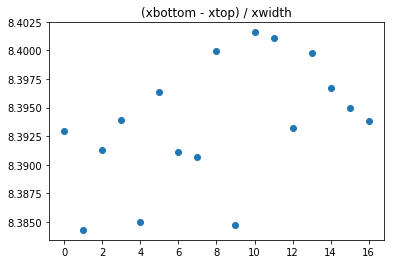

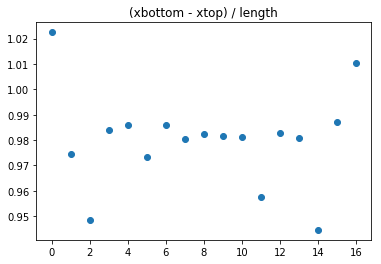

0.9815946027454939
8.393801650446745


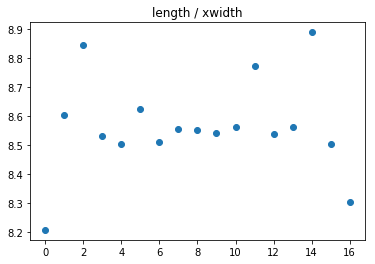

pix to arcsec  8.550889042394088


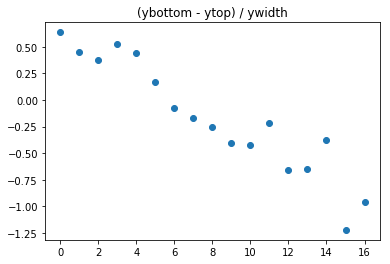

total x  1806.0230005264284


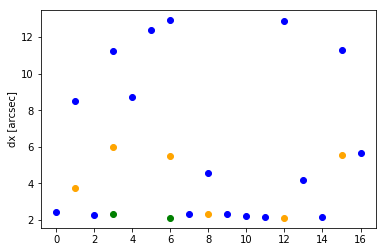

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
xtop = df['xtop']
xbottom = df['xbottom']
xwidth = df['xwidth']
length = df['length']
plt.plot((xbottom-xtop)/xwidth, 'o')
plt.title('(xbottom - xtop) / xwidth')
plt.show()

plt.plot((xbottom-xtop)/length ,'o')
plt.title('(xbottom - xtop) / length')
plt.show()

print(np.median((xbottom-xtop)/length))
print(np.median((xbottom-xtop)/xwidth))

plt.plot(length/xwidth,'o')
plt.title('length / xwidth')

plt.show()
print('pix to arcsec ', np.median(length/xwidth))

ytop=df['ytop']
ybottom = df['ybottom']
ywidth = df['ywidth']
plt.plot((ybottom-ytop)/ywidth, 'o')
plt.title('(ybottom - ytop) / ywidth')

plt.show()

print('total x ',np.sum(xwidth)*8.39)

x = df['position']
x1 = ((df['end_1']+df['start_1'])*0.5)
x2 = ((df['end_2']+df['start_2'])*0.5)
x3 = ((df['end_3']+df['start_3'])*0.5)

pix2arcsec = xwidth / length
dx1 = (x1 - x) * pix2arcsec
dx2 = (x2 - x) * pix2arcsec
dx3 = (x3 - x) * pix2arcsec

plt.plot(dx1, 'o', color = 'blue')
plt.plot(dx2, 'o', color = 'orange')
plt.plot(dx3, 'o', color = 'green')
plt.ylabel('dx [arcsec]')
plt.show()




In [44]:
x8 = -115.227
x22 = -104.839
ra8 = 10.270958
ra22 = 10.274933
print(1668-1747)
print(x8-x22)
print((ra22-ra8)/(1668-1747) *  3600.) # RA is already in degs

-79
-10.388000000000005
-0.18113924050635216


['slit_id', 'xtop', 'ytop', 'xbottom', 'ybottom', 'xwidth', 'ywidth', 'curved', 'position', 'length', 'object_1', 'start_1', 'end_1', 'row_1', 'object_2', 'start_2', 'end_2', 'row_2']
[21 19 18 17 15 14 12 11 -1 10  9  8  7  6  5  4  3  2  1]
[20 -1 -1 16 -1 13 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1782 1678 1530 1415 1320 1237 1181 1110 1025  963  857  772  622  481
  357  284  225  143    0]
[9.24529549e-01 2.12992077e+02 3.18235692e+02 4.66041065e+02
 5.82270812e+02 6.77620031e+02 7.60194146e+02 8.48193919e+02
 9.17017730e+02 9.99976550e+02 1.06146344e+03 1.16496848e+03
 1.25004490e+03 1.40013275e+03 1.54145843e+03 1.66578805e+03
 1.73681042e+03 1.79450699e+03 1.90735998e+03]
0.9245295491680281 2807.9754558108343 147.11928061814365 1.1359838272123852
212.9920767718745 1679.9124979465396 101.7504620028185 0.6431385054850125
318.23569241635573 2110.8620943993124 145.52529494735177 0.8059656934715349
466.04106484602835 3115.240176412456 114.43

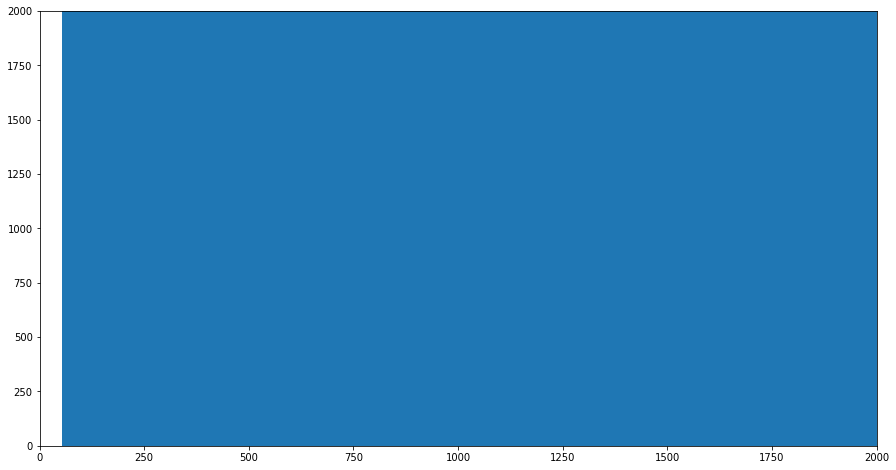

In [54]:
import numpy as np
names = data.field(1)

names = [col.name for col in cols]
print(names)
# Rows in final image for the extracted spectra
print(data['row_1'])  
print(data['row_2'])
print(data['curved'])  # Never curved
print(data['position'])
print(data['xtop'])
# data[:1]
# print(data['object_1'])
# print(data['object_2'])


#print(df['top'])

x2_ = data['xbottom']
x1_ = data['xtop']
y2_ = data['ybottom']
y1_ = data['ytop']

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig,ax = plt.subplots(figsize=(15,8))
ax.set_xlim([0,2000])
ax.set_ylim([0,2000])
for x1, x2, y1, y2 in zip(x1_,x2_,y1_,y2_):
    print(x1,y1,x2-x1,y2-y1)
    rect = Rectangle((x2 - x1, y2 - y1), x1, y1)
    ax.add_patch(rect)
plt.show()
